Import the required libraries

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


Importing the Dataset

In [5]:
dataFrame = pd.read_csv("Annual cause death numbers new.csv")
dataFrame.head()


,Entity,Code,Year,Meningitis fatalities\n\n\n\n\n\n,Dementia fatalities\n\n\n\n\n\n,Parkinson s fatalities\n\n\n\n\n\n,Nutritional deficiency fatalities\n\n\n\n\n\n,Malaria fatalities\n\n\n\n\n\n,Drowning fatalities\n\n\n\n\n\n,Interpersonal violence fatalities\n\n\n\n\n\n,...,Chronic kidney fatalities\n\n\n\n\n\n,Poisoning fatalities\n\n\n\n\n\n,Protein energy malnutrition fatalities\n\n\n\n\n\n,Road injury fatalities\n\n\n\n\n\n,Chronic respiratory fatalities\n\n\n\n\n\n,Chronic liver fatalities\n\n\n\n\n\n,Digestive disease fatalities\n\n\n\n\n\n,Fire fatalities\n\n\n\n\n\n,Acute hepatitis fatalities,Measles fatalities
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,10037
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,10021
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,9807
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,10228
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,12144


1. About the Data

The dataset provided is a collection of annual cause of death numbers, which includes fatalities 
due to various diseases and accidents across different years. Each row represents data for a 
specific country and year, with attributes such as 'Year', 'Meningitis fatalities', 'Dementia 
fatalities', 'Parkinson's fatalities', and many others. The dataset covers a wide range of causes, 
providing a comprehensive overview of the health challenges faced by different populations 
over time.

In [6]:
dataFrame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Entity                                        6840 non-null   object
 1   Code                                          6840 non-null   object
 2   Year                                          6840 non-null   int64 
 3   Meningitis fatalities





                   6840 non-null   int64 
 4   Dementia fatalities





                     6840 non-null   int64 
 5   Parkinson s fatalities





                  6840 non-null   int64 
 6   Nutritional deficiency fatalities





       6840 non-null   int64 
 7   Malaria fatalities





                      6840 non-null   int64 
 8   Drowning fatalities





                     6840 non-null   int64 
 9   Interpersonal violence fatalities





       6840 non-null   int64 
 10  

In [7]:
dataFrame.describe()

,Year,Meningitis fatalities\n\n\n\n\n\n,Dementia fatalities\n\n\n\n\n\n,Parkinson s fatalities\n\n\n\n\n\n,Nutritional deficiency fatalities\n\n\n\n\n\n,Malaria fatalities\n\n\n\n\n\n,Drowning fatalities\n\n\n\n\n\n,Interpersonal violence fatalities\n\n\n\n\n\n,Maternal disorder fatalities\n\n\n\n\n\n,HIV/AIDS fatalities\n\n\n\n\n\n,...,Chronic kidney fatalities\n\n\n\n\n\n,Poisoning fatalities\n\n\n\n\n\n,Protein energy malnutrition fatalities\n\n\n\n\n\n,Road injury fatalities\n\n\n\n\n\n,Chronic respiratory fatalities\n\n\n\n\n\n,Chronic liver fatalities\n\n\n\n\n\n,Digestive disease fatalities\n\n\n\n\n\n,Fire fatalities\n\n\n\n\n\n,Acute hepatitis fatalities,Measles fatalities
count,6840.000000,6840.000000,6.840000e+03,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6.840000e+03,...,6.840000e+03,6840.000000,6840.000000,6.840000e+03,6.840000e+03,6.840000e+03,6.840000e+03,6840.000000,6840.000000,6840.000000
mean,2004.500000,8213.149561,2.736319e+04,6493.627339,11006.353947,18903.160234,8619.055117,10636.648684,6131.066959,2.814125e+04,...,2.506893e+04,2145.455848,9531.528801,3.063496e+04,9.130390e+04,3.189892e+04,5.652551e+04,3006.043275,3112.066520,9789.471053
std,8.656074,34982.933895,1.113146e+05,25767.447063,48289.687100,97346.780570,35879.406010,40888.793762,26355.210370,1.391973e+05,...,9.600839e+04,8433.507625,41689.675155,1.166999e+05,3.772013e+05,1.194387e+05,2.109884e+05,11211.885249,14440.219516,49699.111854
min,1990.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1997.000000,19.000000,1.287500e+02,37.000000,11.000000,0.000000,39.000000,48.000000,6.000000,1.400000e+01,...,2.140000e+02,8.000000,6.000000,2.077500e+02,3.685000e+02,2.047500e+02,4.000000e+02,21.000000,2.000000,0.000000
50%,2004.500000,150.500000,8.455000e+02,209.000000,159.000000,0.000000,253.000000,342.000000,70.500000,1.870000e+02,...,1.080000e+03,72.000000,120.000000,1.239500e+03,2.104000e+03,1.541000e+03,2.778500e+03,152.000000,21.500000,2.000000
75%,2012.000000,1622.250000,4.251000e+03,984.000000,2204.000000,1017.250000,1014.250000,1391.250000,1244.500000,3.836500e+03,...,4.497500e+03,371.000000,2120.000000,5.786250e+03,9.013250e+03,5.670500e+03,9.594000e+03,593.250000,264.000000,773.750000
max,2019.000000,432524.000000,1.623276e+06,362907.000000,757152.000000,961129.000000,460665.000000,463129.000000,302586.000000,1.844490e+06,...,1.427232e+06,92101.000000,656314.000000,1.285039e+06,3.974315e+06,1.472012e+06,2.557689e+06,129705.000000,166405.000000,801683.000000


2. Objectives

I aim to predict the number of fatalities due to Parkinson's disease based on the year. This 
prediction can help in understanding trends and planning healthcare strategies accordingly.
In terms of data exploration, I started by examining the structure of the dataset, checking for 
missing values, and understanding the distribution of key variables. I observed that the dataset 
is well-structured with no missing values for the variables of interest. For data cleaning, I 
ensured that the data types were appropriate for analysis, and for feature engineering, I 
considered using polynomial features to capture non-linear relationships between the year and 
the number of fatalities.

3. Linear Regression Models

In [10]:
x=dataFrame[["Year"]]
y=dataFrame["Parkinson s fatalities\n\n\n\n\n\n"]
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size=0.3,random_state =45)
print(x_train)

      Year
306   1996
62    1992
2146  2006
2715  2005
4377  2017
...    ...
4703  2013
3616  2006
6012  2002
5763  1993
6558  2008

[4788 rows x 1 columns]


In [11]:
model =LinearRegression()#linear regression model
model.fit(x_train,y_train)

LinearRegression()

In [18]:
# Pipeline oluşturma
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(x_train, y_train)

In [20]:
# Tahmin yapma
y_prediction = pipeline.predict(x_test)

In [23]:
y_prediction = model.predict(x_test)
y_train_pred = model.predict(x_train)# making predictions on the test 

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


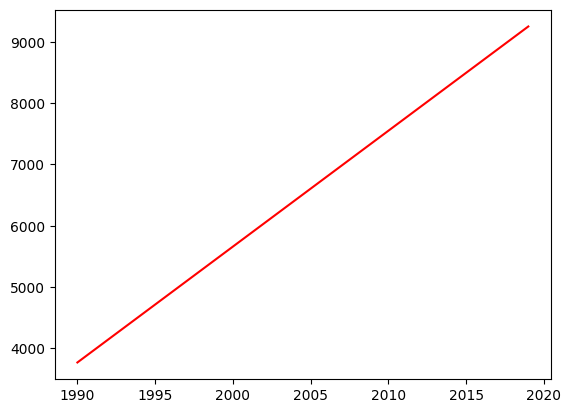

In [24]:
#plot the predicted regression line
sorted_idx = x_train.values.flatten().argsort()
plt.plot(x_train.values.flatten()[sorted_idx], 
model.predict(x_train.values.flatten().reshape(-1,1))[sorted_idx], 
color='red')


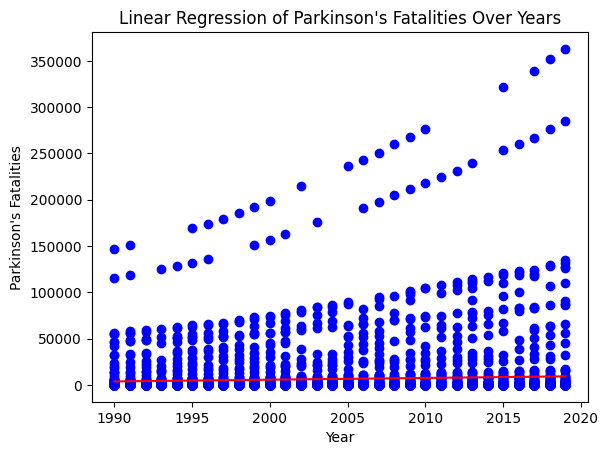

In [25]:
plt.scatter(x_train, y_train, color='blue')
sorted_idx = x_train.values.flatten().argsort()
plt.plot(x_train.values.flatten()[sorted_idx], 
y_train_pred[sorted_idx], color='red')
plt.xlabel('Year')
plt.ylabel('Parkinson\'s Fatalities')
plt.title('Linear Regression of Parkinson\'s Fatalities Over Years')
plt.show()

In [26]:
mse = mean_squared_error(y_test,y_prediction)
r2= r2_score(y_test,y_prediction)
#rmse = root_mean_squared_error(y_test, y_pred) 
mae = mean_absolute_error(y_test, y_prediction)


In [28]:
print(f"Mean Squared Error : {mse}")
print(f"R-Squared: {r2}")
#print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error : 668962554.4243343
R-Squared: 0.00569004922810612
Mean Absolute Error (MAE): 10485.228747627536


Polynomial Regression

In [29]:
X = dataFrame[['Year']].values
y = dataFrame['Parkinson s fatalities\n\n\n\n\n\n'].values


In [30]:
# Separate data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.3, random_state=42)

In [31]:
# Initialize and train polynomial regression model (polynomial of order 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
poly_model.fit(X_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

In [32]:
# Make predictions with polynomial model
poly_predictions = poly_model.predict(X_test)


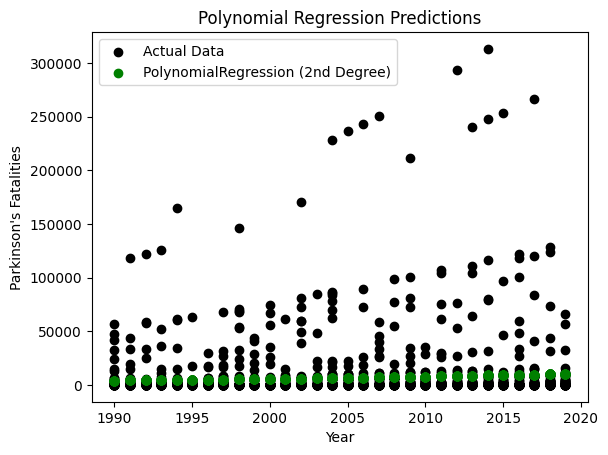

In [34]:
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.scatter(X_test, poly_predictions, color='green', label='PolynomialRegression (2nd Degree)')
plt.xlabel('Year')
plt.ylabel('Parkinson\'s Fatalities')
plt.title('Polynomial Regression Predictions')
plt.legend()
plt.show()


In [35]:
# Calculate metrics for polynomial model
poly_mae = mean_absolute_error(y_test, poly_predictions)
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_test, poly_predictions)


In [36]:
# Print metrics
print("Polynomial Regression Metrics:")
print(f"MAE: {poly_mae}")
print(f"MSE: {poly_mse}")
print(f"RMSE: {poly_rmse}")
print(f"R2: {poly_r2}")


Polynomial Regression Metrics:
MAE: 10144.828168838494
MSE: 600865832.9225518
RMSE: 24512.564796906743
R2: 0.0024690497003511114


Ridge Regression

In [38]:
# Initialize and train Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


Ridge()

In [39]:
#Make predictions with the Ridge model
ridge_predictions = ridge_model.predict(X_test)


In [40]:
# Calculate metrics for Ridge model
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_predictions)

In [41]:
# Print metrics
print("Ridge Regression Metrics:")
print(f"MAE: {ridge_mae}")
print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")
print(f"R2: {ridge_r2}\n")


Ridge Regression Metrics:
MAE: 10143.259718192781
MSE: 600697678.429278
RMSE: 24509.13459160233
R2: 0.0027482123724182905



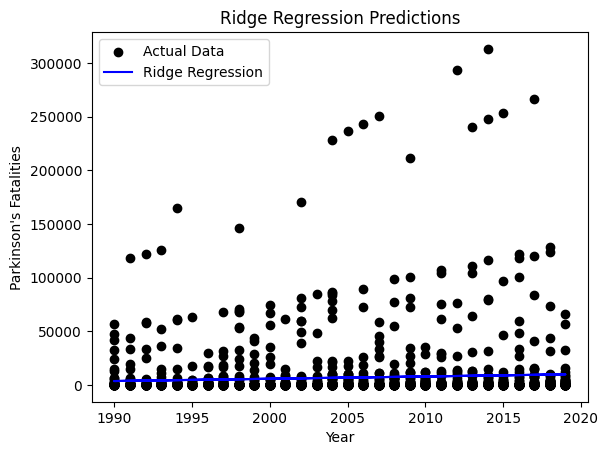

In [42]:
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, ridge_predictions, color='blue', label='Ridge Regression')
plt.xlabel('Year')
plt.ylabel('Parkinson\'s Fatalities')
plt.title('Ridge Regression Predictions')
plt.legend()
plt.show()


Lasso Regression


In [44]:
# Initialize and train Lasso regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [45]:
#Make predictions with the Lasso model
lasso_predictions = lasso_model.predict(X_test)

In [46]:
#Calculate metrics for Lasso model
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_predictions)

In [47]:
print("Lasso Regression Metrics:")
print(f"MAE: {lasso_mae}")
print(f"MSE: {lasso_mse}")
print(f"RMSE: {lasso_rmse}")
print(f"R2: {lasso_r2}")

Lasso Regression Metrics:
MAE: 10143.258848489035
MSE: 600697605.276474
RMSE: 24509.13309924433
R2: 0.0027483338174765226


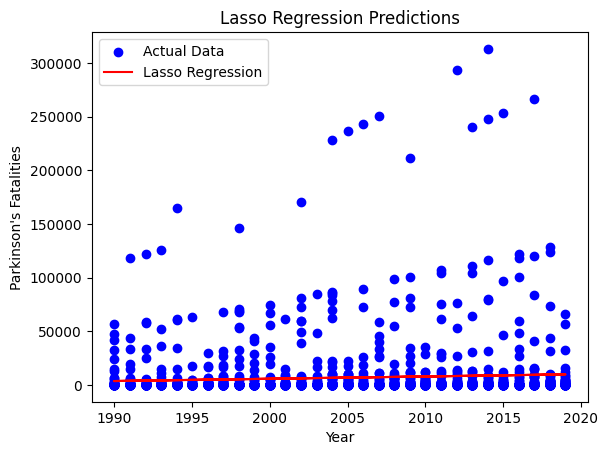

In [49]:
#plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, lasso_predictions, color='red', label='Lasso Regression')
plt.xlabel('Year')
plt.ylabel('Parkinson\'s Fatalities')
plt.title('Lasso Regression Predictions')
plt.legend()
plt.show()